Research Question:  What is the projected average of 5 randomly chosen players casted into a starting lineup, and how does this compare to each player’s historical average?

API: Balldontlie 

Sourced 2 datasets: 

1.   All time Player Metric Data 
2.   Regular Season Player Stats - szn: 2022 -avg

Inner Merged them on player ID from the season 2022

Cleaned by removing all players that did not play in 2022


*   this was done to relate the player metric data to the average point/stat perfomance of each player to the player metric data
*   we removed all players that did not play in 2022



The final data set has 30 teams worth of data, and 248 players worth of data



Do not run the 3 cells below as this will source the data again... the final data set is provided in the submission. If you would like to run the data set, there are cells below in which you can run with the final data set loaded

In [ ]:
## sources player information from API: Player metric data: height, weight, etc
## sources every player since 1970

import requests
import pandas as pd
from pandas import json_normalize
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


df_playerstats = pd.DataFrame()

for i in range(1, 3093):
    response = requests.get("https://www.balldontlie.io/api/v1/players/" + str(i))
    nba_szn = response.json()
    before = json_normalize(nba_szn)
    df_playerstats = df_playerstats.append(before)
    time.sleep(2)
    print(i)


df_playerstats
df_playerstats.to_excel('data301_personalplayerstats1.xlsx')

,games_played,player_id,season,min,fgm,fga,fg3m,fg3a,ftm,fta,...,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
0,31,1,2018,18:50,1.74,5.00,1.26,4.03,0.39,0.42,...,1.55,0.65,0.55,0.19,0.45,1.68,5.13,0.348,0.312,0.923
0,34,2,2018,12:34,1.12,3.24,0.74,2.18,0.21,0.26,...,1.79,1.94,0.38,0.15,0.82,1.32,3.18,0.345,0.338,0.778
0,80,3,2018,33:19,6.01,10.09,0.00,0.03,1.83,3.65,...,9.50,1.55,1.48,0.95,1.71,2.55,13.85,0.596,0.000,0.500
0,82,4,2018,23:19,3.41,5.93,0.04,0.18,2.02,2.76,...,7.28,2.24,0.88,0.79,1.48,2.48,8.89,0.576,0.200,0.735
0,7,5,2018,3:05,0.43,1.43,0.00,0.57,0.14,0.29,...,0.57,0.86,0.29,0.00,0.29,0.57,1.00,0.300,0.000,0.500
0,81,6,2018,33:10,8.44,16.28,0.12,0.52,4.31,5.09,...,9.20,2.40,0.53,1.32,1.78,2.21,21.32,0.519,0.238,0.847
0,11,7,2018,10:56,1.18,3.55,0.27,1.09,0.73,1.09,...,2.36,1.18,0.09,0.00,0.73,0.64,3.36,0.333,0.250,0.667
0,48,8,2018,8:40,1.40,3.71,0.67,2.06,0.94,1.25,...,0.50,0.52,0.10,0.13,0.69,0.98,4.40,0.376,0.323,0.750
0,80,9,2018,26:12,4.19,7.10,0.08,0.56,2.46,3.48,...,8.41,1.38,0.55,1.50,1.30,2.30,10.91,0.590,0.133,0.709


In [ ]:
## imports individual player statistics of season 2022
## only 248 players from 30 teams were sourced

import requests
import pandas as pd
from pandas import json_normalize
import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

nba_stats = pd.DataFrame()
before = pd.DataFrame()
for i in range(1,3093):
    response = requests.get("https://www.balldontlie.io/api/v1/season_averages?season=2022&player_ids[]=" + str(i))
    cur = response.json()
    nba_stats = pd.DataFrame.from_dict(cur["data"])
    before = before.append(nba_stats)
    print(i)
    time.sleep(1.1)
before

before.to_excel('data301_player_avg.xlsx')

In [ ]:
# joins the two datasets together and drops players that did not play in 2022

player_info = pd.read_excel('data301_personalplayerstats1.xlsx')
player_stat = pd.read_excel('data301_player_avg.xlsx')
full_player_df = pd.merge(player_info, player_stat, left_on = "id", right_on="player_id", how = 'inner')
full_player_df

full_player_df.to_excel('cleaned_player_data301.xlsx')

You may run this cell with the data set in the submission!Please look through the data file as it is fairly small, but the possibilites for this data set is endless

In [ ]:
## Display data... load in data from canvas and upload it to the colab

import requests
import pandas as pd
from pandas import json_normalize
import time
import warnings

player_data = pd.read_excel('cleaned_player_data301.xlsx')
pd.set_option('display.max_columns', None)

In [ ]:
player_data

,id,first_name,height_feet,height_inches,last_name,position,weight_pounds,team.id,team.abbreviation,team.city,team.conference,team.division,team.full_name,team.name,Unnamed: 0_y,games_played,player_id,season,min,fgm,fga,fg3m,fg3a,ftm,fta,oreb,dreb,reb,ast,stl,blk,turnover,pf,pts,fg_pct,fg3_pct,ft_pct
0,3,Steven,7.0,0.0,Adams,C,265.0,15,MEM,Memphis,West,Southwest,Memphis Grizzlies,Grizzlies,0,9,3,2022,26:06,3.11,5.33,0.0,0.00,0.78,2.56,4.67,6.44,11.11,2.56,0.78,1.56,2.11,2.44,7.00,0.583,0.000,0.304
1,4,Bam,6.0,10.0,Adebayo,C-F,255.0,16,MIA,Miami,East,Southeast,Miami Heat,Heat,0,10,4,2022,35:00,7.00,13.10,0.0,0.30,3.90,4.50,2.30,6.10,8.40,3.50,1.20,0.90,3.60,3.60,17.90,0.534,0.000,0.867
2,8,Grayson,6.0,5.0,Allen,G,198.0,17,MIL,Milwaukee,East,Central,Milwaukee Bucks,Bucks,0,9,8,2022,26:00,3.00,7.44,2.0,4.89,2.00,2.22,0.78,2.33,3.11,2.33,1.00,0.11,1.44,1.22,10.00,0.403,0.409,0.900
3,9,Jarrett,6.0,11.0,Allen,C,237.0,6,CLE,Cleveland,East,Central,Cleveland Cavaliers,Cavaliers,0,8,9,2022,33:00,5.88,10.25,0.0,0.25,1.88,2.63,4.00,7.38,11.38,1.13,0.13,1.25,1.63,2.13,13.63,0.573,0.000,0.714
4,12,Kyle,6.0,9.0,Anderson,F,230.0,18,MIN,Minnesota,West,Northwest,Minnesota Timberwolves,Timberwolves,0,10,12,2022,10:12,0.80,1.30,0.2,0.40,0.90,1.10,0.40,1.30,1.70,1.40,0.40,0.20,0.40,0.80,2.70,0.615,0.500,0.818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2148,Thanasis,NaN,NaN,Antetokounmpo,NaN,NaN,17,MIL,Milwaukee,East,Central,Milwaukee Bucks,Bucks,0,9,2148,2022,0:53,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.22,0.22,0.00,0.00,0.11,0.00,0.11,0.00,0.000,0.000,0.000
244,2175,Danuel,6.0,7.0,House Jr.,NaN,220.0,23,PHI,Philadelphia,East,Atlantic,Philadelphia 76ers,76ers,0,10,2175,2022,14:48,1.00,2.70,0.5,1.60,0.80,1.10,0.40,1.40,1.80,0.90,0.30,0.10,0.60,1.20,3.30,0.370,0.313,0.727
245,2189,Gary,NaN,NaN,Payton II,NaN,NaN,25,POR,Portland,West,Northwest,Portland Trail Blazers,Trail Blazers,0,9,2189,2022,0:00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.000
246,3089,Gary,6.0,6.0,Trent Jr.,NaN,205.0,28,TOR,Toronto,East,Atlantic,Toronto Raptors,Raptors,0,9,3089,2022,35:46,6.78,15.67,3.0,8.33,2.56,3.22,0.89,1.00,1.89,1.22,1.33,0.22,1.00,1.11,19.11,0.433,0.360,0.793


This data shows each player of the 2022 season: their individual player attributes like height, position, etc and their corresponding basketball metrics like points, fouls, assists, rebounds, etc. The data is either str or float

Below are some examples of how data can be used:

example: all player stats average per team:

In [ ]:
by_team = player_data.groupby(['team.id','team.abbreviation']).mean().reset_index()

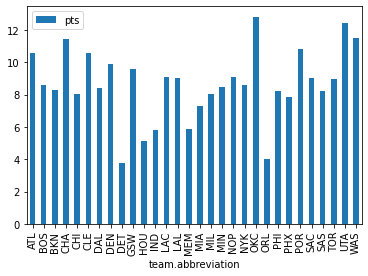

In [ ]:
import matplotlib.pyplot as plt

by_team.plot(kind = 'bar', x = 'team.abbreviation', y = 'pts')

plt.show()

example: individual teams: Lakers average points per player

In [ ]:
lakers_df = player_data.loc[player_data['team.abbreviation'] == 'LAL']

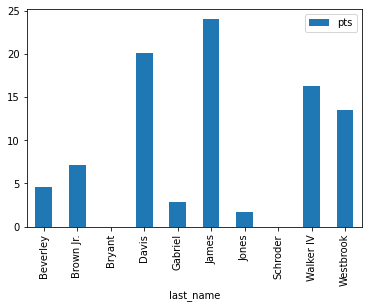

In [ ]:
lakers_df.plot(kind = 'bar', x = 'last_name', y = 'pts')

plt.show()